<a href="https://colab.research.google.com/github/Abhi050/Data-Analytics-Practice-notebook/blob/main/EDA_2_(Black_Friday_Sales_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
## Black Friday Dataset EDA and feature Engineering
## Cleaning and Preparing the dataset for model training
## Dataset can be download from the link: https://www.kaggle.com/datasets/sdolezel/black-friday?resource=download

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [32]:
#importing the dataset 

df_train = pd.read_csv("train.csv")
df_train.shape
#df_train.head(10)

(550068, 12)

In [33]:
df_test = pd.read_csv("test.csv")
df_test.shape



(233599, 11)

In [34]:
#during hackathons and kaggle compt usually combine test and train data
#merge, contact, append can be use here but eah has different fnctionality

df=df_train.append(df_test)
df.shape

(783667, 12)

In [35]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [36]:
##BASIC code
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [37]:
df.drop(["User_ID"], axis= 1, inplace = True)# axis =1 means column wise

In [38]:
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


# Data Pre processing

1. Categorical Features

In [39]:
# Data Pre processing for caegorical features
"""
pd.get_dummies(df["Gender"], drop_first = True) #but this will make process bit more complex as 
i will need to remove the existing column and then merge the new one.
"""
df["Gender"]=df["Gender"].map({"F":0, "M":1})
df.head(10)


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [40]:
# handle categorical feature Age

df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [41]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [42]:
##second technqiue
# from sklearn import preprocessing
 
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
 
# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])
 
# df['Age'].unique()

In [43]:
df["Age"]

0         1
1         1
2         1
3         1
4         7
         ..
233594    3
233595    3
233596    3
233597    5
233598    5
Name: Age, Length: 783667, dtype: int64

In [44]:
df["City_Category"].unique()


array(['A', 'C', 'B'], dtype=object)

In [45]:
# df.drop(["GendCity_Category"], inplace = True, axis =1)

In [46]:
df["City_Category"]=df["City_Category"].map({"A":1, "B":2, "C": 3})
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,1,3,0,1,2.0,NaN,15227.0
6,P00184942,1,5,7,2,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,2,2,1,1,15.0,NaN,15854.0
8,P0097242,1,5,7,2,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,1,1,1,8,NaN,NaN,7871.0


In [47]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [48]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [49]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].map({"4+":4,"1":1,"2":2,"3":3,"0":0})
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,1,3,0,1,2.0,NaN,15227.0
6,P00184942,1,5,7,2,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,2,2,1,1,15.0,NaN,15854.0
8,P0097242,1,5,7,2,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,1,1,1,8,NaN,NaN,7871.0


In [50]:
df.drop(["Product_ID"], inplace = True, axis=1)

2. Missing Values

In [51]:
#searching for missing values
for i in df.columns:
  print(i+"       ")
  print( df[i].unique())
  print("  ")

Gender       
[0 1]
  
Age       
[1 7 3 5 6 4 2]
  
Occupation       
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
  
City_Category       
[1 3 2]
  
Stay_In_Current_City_Years       
[2 4 3 1 0]
  
Marital_Status       
[0 1]
  
Product_Category_1       
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
  
Product_Category_2       
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
  
Product_Category_3       
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
  
Purchase       
[ 8370. 15200.  1422. ...   123.   613.    nan]
  


In [52]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [53]:
#Focus on missing values
# First we need to explore and know more about the features containing missing values

df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [54]:
#Since the feature contains a lot of discrete values, we will use mode
"""
df["Product_Category_2"].mode(0 )
The above statement will result a series/array of 0 and 8, will be simply use 8 as mode here since 0 represen nan values here
"""
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [55]:
df["Product_Category_2"].isnull().sum()

df["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [56]:
df["Product_Category_3"].mode()[0]

16.0

In [57]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [58]:
df["Product_Category_3"].isnull().sum()

0

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 65.8 MB


In [60]:
"""
Convert object into integers

df["aaaa"]= df["aaaa"].astype(int)
"""


'\nConvert object into integers\n\ndf["aaaa"]= df["aaaa"].astype(int)\n'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


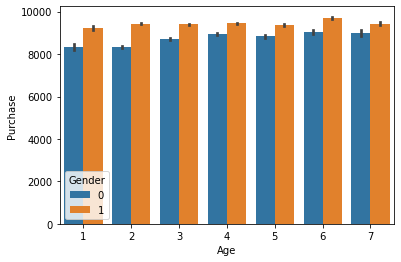

In [62]:
## Visualization

# sns.pairplot(df)

sns.barplot("Age","Purchase",hue="Gender", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


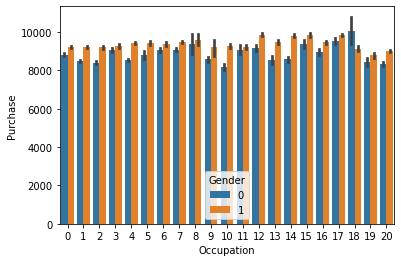

In [63]:
## Visualization of purchase with occupation

sns.barplot("Occupation","Purchase",hue="Gender", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


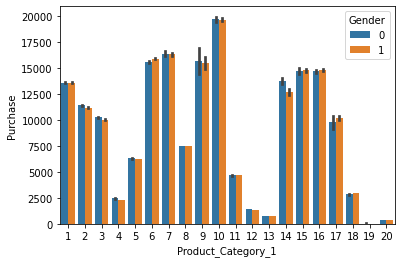

In [64]:
sns.barplot("Product_Category_1","Purchase",hue="Gender", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


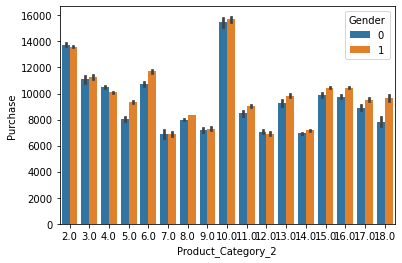

In [65]:
sns.barplot("Product_Category_2","Purchase",hue="Gender", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


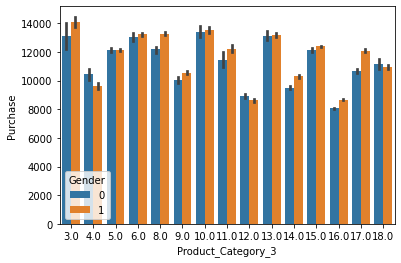

In [66]:
sns.barplot("Product_Category_3","Purchase",hue="Gender", data = df)

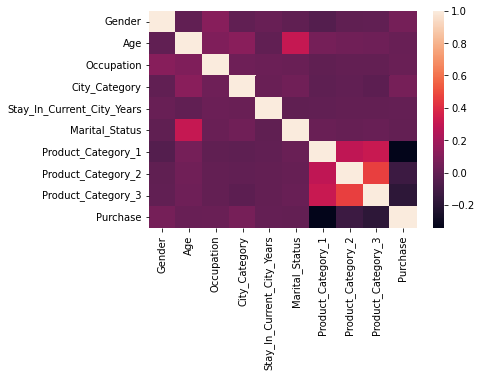

In [68]:
sns.heatmap(df.corr())

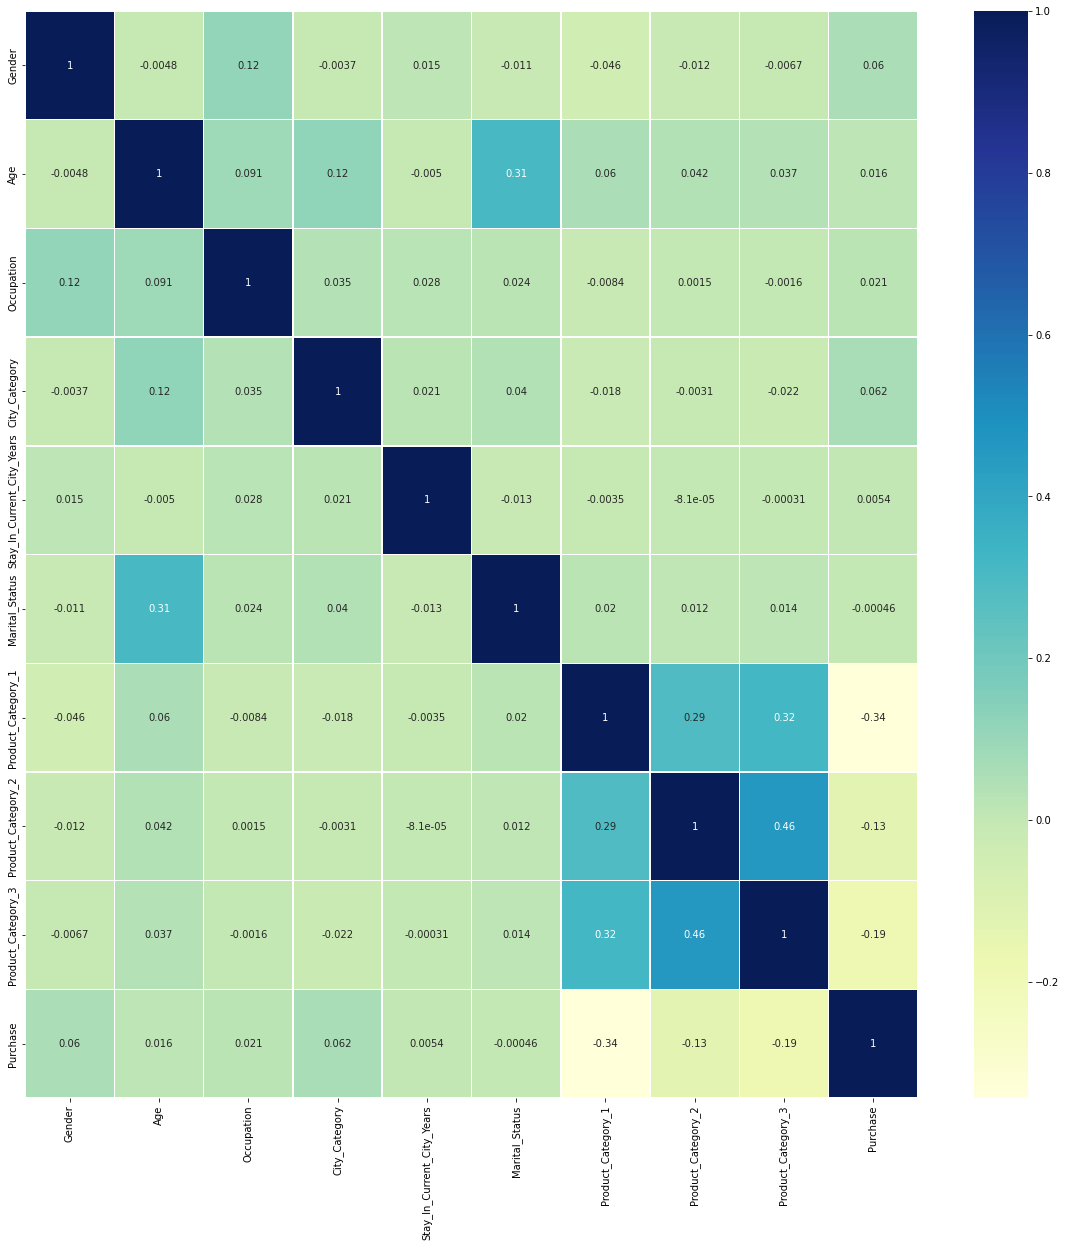

In [80]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(), cmap="YlGnBu",annot = True, linewidths =.5)

4. Feature Scaling

In [87]:
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [88]:
df_train.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0
5,1,3,15,1,3,0,1,2.0,16.0,15227.0
6,1,5,7,2,2,1,1,8.0,17.0,19215.0
7,1,5,7,2,2,1,1,15.0,16.0,15854.0
8,1,5,7,2,2,1,1,16.0,16.0,15686.0
9,1,3,20,1,1,1,8,8.0,16.0,7871.0


In [90]:
# feature scaling



X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
# Model ready to work